In [7]:
import pandas as pd

df_cysdb = pd.read_csv('cysdb_predictions.csv')
df_mol_glue = pd.read_csv('mol_glue_predictions.csv')

In [8]:
# descending order by pchembl predicted
df_cysdb = df_cysdb.sort_values(by='Predicted pChEMBL', ascending=False)
df_mol_glue = df_mol_glue.sort_values(by='Predicted pChEMBL', ascending=False)

In [5]:
df_mol_glue

,SMILES,Sequence,Predicted pChEMBL
1056,O=C1CCC(N2CC3=C(C=CC(CNC(=O)NC4=CC=CC=C4C4=CC=...,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,8.263971
1183,O=C1CCC(N2CC3=CC(CNC(=O)NC4=C(Cl)C=CC=C4Cl)=CC...,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,7.997523
1188,O=C1CCC(N2CC3=CC(CNC(=O)NC4=CC=CC(Cl)=C4)=CC=C...,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,7.844722
1879,CC1=C(C)C2=C(S1)N1C(C)=NN=C1[C@H](CC(=O)N1CCN(...,MTPSQWLDIAVLAVAFIAAISGWRAGALGSMLSFGGVLLGATAGVL...,7.841142
1154,O=C1CCC(N2CC3=C(NC4=NC(NC5=CC=CC=C5F)NC=C4)C=C...,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,7.808289
...,...,...,...
2557,O=C1CCC(C2=CC=CC=C2)C(=O)N1,MTPSQWLDIAVLAVAFIAAISGWRAGALGSMLSFGGVLLGATAGVL...,4.500900
2339,COC1=CC=CC(C2CCC(=O)NC2=O)=C1,MTPSQWLDIAVLAVAFIAAISGWRAGALGSMLSFGGVLLGATAGVL...,4.499424
2569,O=C1CCC(CSC2=CC=CC=C2C(=O)O)C(=O)N1,MTPSQWLDIAVLAVAFIAAISGWRAGALGSMLSFGGVLLGATAGVL...,4.486635
3084,O=C(O)COC1=CC=C(N2CCC(=O)NC2=O)C=C1,MTPSQWLDIAVLAVAFIAAISGWRAGALGSMLSFGGVLLGATAGVL...,4.480208


In [9]:
# List top 10 predictions for each protein on each dataset

# Group by unique proteins (Sequence) and get top 10 predictions for each
top10_cysdb = df_cysdb.groupby('Sequence').head(10)
top10_mol_glue = df_mol_glue.groupby('Sequence').head(10)

# Add rank column based on Predicted pChEMBL (1 = highest)
top10_cysdb['Rank'] = top10_cysdb.groupby('Sequence')['Predicted pChEMBL'].rank(ascending=False, method='dense').astype(int)
top10_mol_glue['Rank'] = top10_mol_glue.groupby('Sequence')['Predicted pChEMBL'].rank(ascending=False, method='dense').astype(int)

# Display top 10 for each protein in df_cysdb
for seq, group in top10_cysdb.groupby('Sequence'):
    print(f"Top 10 for protein {seq[:20]} in CysDB...:")
    print(group[['SMILES', 'Predicted pChEMBL']].to_string(index=False))
    print("\n")

# Display top 10 for each protein in df_mol_glue
for seq, group in top10_mol_glue.groupby('Sequence'):
    print(f"Top 10 for protein {seq[:20]} in mol_glue...:")  # Truncate sequence for display
    print(group[['SMILES', 'Predicted pChEMBL']].to_string(index=False))
    print("\n")

Top 10 for protein MAVRELPGAWNFRDVADTAT in CysDB...:
                                 SMILES  Predicted pChEMBL
        C=CC(=O)NCC1CCCCN1C(=O)C(F)(F)F           6.854218
      C=CC(=O)N1CC(O)(c2cccc3ccccc23)C1           6.483842
 C=CC(=O)NC1(c2ccc(S(C)(=O)=O)cc2)CCOC1           6.350819
C=CC(=O)Nc1cc(C(F)(F)F)cc(S(=O)(=O)F)c1           6.283827
 C=CC(=O)N[C@@H]1CCC(=O)N[C@H]1C(C)(C)C           6.218881
    C=CC(=O)Nc1ccc2c(c1)CCC(=O)N2CC1CC1           6.211812
        C=CC(=O)NC1(c2noc(C(F)F)n2)CCC1           6.201700
  C=CC(=O)N[C@@H]1CCO[C@H]1c1ccc(OC)nc1           6.083624
              C=CC(=O)N1CCCC(n2ccnn2)C1           6.047443
      NS(=O)(=O)c1ccc(Cl)c(NC(=O)CCl)c1           6.043464


Top 10 for protein MLRGIQALSRPLTRVYRALA in CysDB...:
                                  SMILES  Predicted pChEMBL
C=CC(=O)NC(c1cccc(C(F)(F)F)c1)c1nnc[nH]1           6.636201
           C=CC(=O)N1CCc2nnc(N(C)C)cc2C1           6.587095
     C=CC(=O)N1CC[C@@H]2COC(=O)N[C@H]2C1           6.531329
   

/tmp/ipykernel_219182/1792979008.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_cysdb['Rank'] = top10_cysdb.groupby('Sequence')['Predicted pChEMBL'].rank(ascending=False, method='dense').astype(int)
/tmp/ipykernel_219182/1792979008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_mol_glue['Rank'] = top10_mol_glue.groupby('Sequence')['Predicted pChEMBL'].rank(ascending=False, method='dense').astype(int)


In [4]:
top10_cysdb

,SMILES,Sequence,Predicted pChEMBL,Rank
160,C=CC(=O)NCC1CCCCN1C(=O)C(F)(F)F,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,6.854218,1
521,C=CC(=O)N1[C@H](C(=O)OC)Cc2c([nH]c3ccccc23)[C@...,MTPSQWLDIAVLAVAFIAAISGWRAGALGSMLSFGGVLLGATAGVL...,6.720123,1
868,C=CC(=O)NC(c1cccc(C(F)(F)F)c1)c1nnc[nH]1,MLRGIQALSRPLTRVYRALAVIGVLAASLLASWVGAVPQVGLAASA...,6.636201,1
569,NS(=O)(=O)c1ccc(Cl)c(NC(=O)CCl)c1,MTPSQWLDIAVLAVAFIAAISGWRAGALGSMLSFGGVLLGATAGVL...,6.597511,2
744,C=CC(=O)N1CCc2nnc(N(C)C)cc2C1,MLRGIQALSRPLTRVYRALAVIGVLAASLLASWVGAVPQVGLAASA...,6.587095,2
818,C=CC(=O)N1CC[C@@H]2COC(=O)N[C@H]2C1,MLRGIQALSRPLTRVYRALAVIGVLAASLLASWVGAVPQVGLAASA...,6.531329,3
803,C=CC(=O)N1CCOC(Cn2ccnn2)C1,MLRGIQALSRPLTRVYRALAVIGVLAASLLASWVGAVPQVGLAASA...,6.500310,4
21,C=CC(=O)N1CC(O)(c2cccc3ccccc23)C1,MAVRELPGAWNFRDVADTATALRPGRLFRSSELSRLDDAGRATLRR...,6.483842,2
405,C=CC(=O)N1C2CCC1c1cnc(C(C)C)nc1C2,MTPSQWLDIAVLAVAFIAAISGWRAGALGSMLSFGGVLLGATAGVL...,6.367414,3
849,C=CC(=O)N1CCCC(n2ccnn2)C1,MLRGIQALSRPLTRVYRALAVIGVLAASLLASWVGAVPQVGLAASA...,6.351569,5


In [14]:
import os, json, hashlib
from pathlib import Path

# Configuration
OUTPUT_ROOT = Path('AF3-T10')  # Base directory specified by user
SUBDIRS = {
    'cysdb': OUTPUT_ROOT / 'cysdb',
    'mol_glue': OUTPUT_ROOT / 'mol_glue'
}
MODEL_SEEDS = [0]  # You can add more seeds if you want multiple predictions
LIGAND_ID_START = ord('B')  # 'A' reserved for the protein chain
MAX_LIGANDS_PER_FILE = 10
VERSION = 2

# Ensure output directories exist
for p in SUBDIRS.values():
    p.mkdir(parents=True, exist_ok=True)


def shorten_sequence(seq: str, head: int = 12, tail: int = 3) -> str:
    """Create a compact identifier fragment for filenames from a protein sequence."""
    if len(seq) <= head + tail:
        return seq
    return f"{seq[:head]}_{seq[-tail:]}"


def seq_hash(seq: str, n: int = 8) -> str:
    return hashlib.sha1(seq.encode()).hexdigest()[:n]


def escape_smiles(smiles: str) -> str:
    """Return a JSON-safe SMILES (json.dumps handles escaping, we just keep raw here)."""
    # json.dumps will handle necessary escaping during final dump
    return smiles.strip()


def build_af3_input(protein_sequence: str, lig_smiles: list[str], job_name: str, description: str | None = None) -> dict:
    """Construct a minimal AlphaFold3 JSON input dict with a single protein and multiple SMILES ligands."""
    sequences = []
    # Protein entry
    protein_entry = {
        'protein': {
            'id': 'A',
            'sequence': protein_sequence,
        }
    }
    if description:
        protein_entry['protein']['description'] = description
    sequences.append(protein_entry)

    # Ligand entries (SMILES). Each needs a unique ID (single uppercase letter OK)
    for idx, smiles in enumerate(lig_smiles):
        chain_id = chr(LIGAND_ID_START + idx)  # B, C, D, ...
        sequences.append({
            'ligand': {
                'id': chain_id,
                'smiles': escape_smiles(smiles)
            }
        })

    return {
        'name': job_name,
        'modelSeeds': MODEL_SEEDS,
        'sequences': sequences,
        'dialect': 'alphafold3',
        'version': VERSION
    }


def write_json(data: dict, path: Path):
    with path.open('w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=2)


# Helper to extract top N ligand SMILES per sequence from a precomputed top10 dataframe
# (top10_cysdb / top10_mol_glue already produced in earlier cell)

def generate_files(top10_df, dataset_key: str):
    out_dir = SUBDIRS[dataset_key]
    summary_rows = []
    for seq, group in top10_df.groupby('Sequence'):
        # Take up to MAX_LIGANDS_PER_FILE SMILES in the already sorted order
        ligands = group['SMILES'].head(MAX_LIGANDS_PER_FILE).tolist()
        job_base = f"{dataset_key}_top10"
        seq_fragment = shorten_sequence(seq)
        h = seq_hash(seq)
        job_name = f"{job_base}_{seq_fragment}_{h}"  # AF3 job name (sanitized automatically later by their pipeline)
        filename = f"{job_name}.json"
        af3_dict = build_af3_input(
            protein_sequence=seq,
            lig_smiles=ligands,
            job_name=job_name
        )
        write_json(af3_dict, out_dir / filename)
        summary_rows.append({
            'dataset': dataset_key,
            'sequence_hash': h,
            'sequence_len': len(seq),
            'file': str(out_dir / filename),
            'n_ligands': len(ligands)
        })
    return pd.DataFrame(summary_rows)


# Generate JSON files for both datasets
summary_cysdb = generate_files(top10_cysdb, 'cysdb')
summary_mg = generate_files(top10_mol_glue, 'mol_glue')
summary = pd.concat([summary_cysdb, summary_mg], ignore_index=True)

print(f"Generated {len(summary)} AlphaFold3 input JSON files in '{OUTPUT_ROOT}/' (subdirectories per dataset).")
summary

Generated 6 AlphaFold3 input JSON files in 'AF3-T10/' (subdirectories per dataset).


,dataset,sequence_hash,sequence_len,file,n_ligands
0,cysdb,80d0e9c6,276,AF3-T10/cysdb/cysdb_top10_MAVRELPGAWNF_LLG_80d...,10
1,cysdb,8d6a6b70,299,AF3-T10/cysdb/cysdb_top10_MLRGIQALSRPL_WGD_8d6...,10
2,cysdb,dd60f888,397,AF3-T10/cysdb/cysdb_top10_MTPSQWLDIAVL_CVS_dd6...,10
3,mol_glue,80d0e9c6,276,AF3-T10/mol_glue/mol_glue_top10_MAVRELPGAWNF_L...,10
4,mol_glue,8d6a6b70,299,AF3-T10/mol_glue/mol_glue_top10_MLRGIQALSRPL_W...,10
5,mol_glue,dd60f888,397,AF3-T10/mol_glue/mol_glue_top10_MTPSQWLDIAVL_C...,10


In [15]:
from pathlib import Path
import json

# Per-row (protein + single ligand) JSON generation
ROW_SUBDIRS = {
    'cysdb': OUTPUT_ROOT / 'cysdb_single',
    'mol_glue': OUTPUT_ROOT / 'mol_glue_single'
}
for p in ROW_SUBDIRS.values():
    p.mkdir(parents=True, exist_ok=True)


def generate_row_files(top10_df, dataset_key: str):
    out_dir = ROW_SUBDIRS[dataset_key]
    rows = []
    for i, row in top10_df.reset_index(drop=True).iterrows():
        seq = row['Sequence']
        smiles = row['SMILES']
        pred = row.get('Predicted pChEMBL', None)
        seq_fragment = shorten_sequence(seq)
        h = seq_hash(seq)
        pred_tag = f"p{pred:.2f}".replace('.', 'p') if isinstance(pred, (int, float)) else 'pNA'
        job_name = f"{dataset_key}_single_{seq_fragment}_{h}_{pred_tag}_{i:04d}"[:150]  # limit length
        filename = f"{job_name}.json"
        af3_dict = build_af3_input(
            protein_sequence=seq,
            lig_smiles=[smiles],
            job_name=job_name,
        )
        with (out_dir / filename).open('w', encoding='utf-8') as f:
            json.dump(af3_dict, f, ensure_ascii=False, indent=2)
        rows.append({
            'dataset': dataset_key,
            'index': i,
            'sequence_hash': h,
            'sequence_len': len(seq),
            'predicted_pChEMBL': pred,
            'file': str(out_dir / filename)
        })
    return pd.DataFrame(rows)

row_summary_cysdb = generate_row_files(top10_cysdb, 'cysdb')
row_summary_mg = generate_row_files(top10_mol_glue, 'mol_glue')
row_summary = pd.concat([row_summary_cysdb, row_summary_mg], ignore_index=True)
print(f"Generated {len(row_summary)} single-row AlphaFold3 JSON files (one ligand per file) in: {', '.join(str(p) for p in ROW_SUBDIRS.values())}")
row_summary.head()

Generated 60 single-row AlphaFold3 JSON files (one ligand per file) in: AF3-T10/cysdb_single, AF3-T10/mol_glue_single


,dataset,index,sequence_hash,sequence_len,predicted_pChEMBL,file
0,cysdb,0,80d0e9c6,276,6.854218,AF3-T10/cysdb_single/cysdb_single_MAVRELPGAWNF...
1,cysdb,1,dd60f888,397,6.720123,AF3-T10/cysdb_single/cysdb_single_MTPSQWLDIAVL...
2,cysdb,2,8d6a6b70,299,6.636201,AF3-T10/cysdb_single/cysdb_single_MLRGIQALSRPL...
3,cysdb,3,dd60f888,397,6.597511,AF3-T10/cysdb_single/cysdb_single_MTPSQWLDIAVL...
4,cysdb,4,8d6a6b70,299,6.587095,AF3-T10/cysdb_single/cysdb_single_MLRGIQALSRPL...


In [2]:
import os
import json
import pandas as pd
from pathlib import Path
import re

def extract_af3_results(base_path):
    """
    Extract AlphaFold3 results from output directories and correlate with pChEMBL predictions.
    """
    results = []
    base_path = Path(base_path)
    
    # Process all output directories (both single and batch predictions)
    output_dirs = [
        'cysdb_output', 'cysdb_single_output', 
        'mol_glue_output', 'mol_glue_single_output'
    ]
    
    for output_dir in output_dirs:
        output_path = base_path / output_dir
        if not output_path.exists():
            continue
            
        print(f"Processing {output_dir}...")
        
        for result_folder in output_path.iterdir():
            if not result_folder.is_dir():
                continue
                
            folder_name = result_folder.name
            print(f"  Processing {folder_name}")
            
            # Parse folder name to extract information
            dataset = 'cysdb' if 'cysdb' in folder_name else 'mol_glue'
            is_single = 'single' in folder_name
            
            # Extract protein hash and predicted pChEMBL from folder name
            # Format: dataset_[single_]protein_fragment_hash[_pX.XX_index]
            name_parts = folder_name.split('_')
            
            # Find protein fragment and hash
            protein_fragment = None
            protein_hash = None
            predicted_pchembl = None
            index = None
            
            if is_single:
                # Single prediction format: dataset_single_fragment_hash_pX.XX_index
                if len(name_parts) >= 6:
                    protein_fragment = name_parts[2]
                    protein_hash = name_parts[3]
                    pchembl_part = name_parts[4]  # e.g., p6p04
                    index = name_parts[5]
                    
                    # Convert pX.XX format back to decimal
                    if pchembl_part.startswith('p') and 'p' in pchembl_part[1:]:
                        pchembl_str = pchembl_part[1:].replace('p', '.')
                        try:
                            predicted_pchembl = float(pchembl_str)
                        except ValueError:
                            predicted_pchembl = None
            else:
                # Batch prediction format: dataset_top10_fragment_hash
                if len(name_parts) >= 4:
                    protein_fragment = name_parts[2]
                    protein_hash = name_parts[3]
            
            # Load summary confidences
            summary_conf_file = result_folder / f"{folder_name}_summary_confidences.json"
            ranking_scores_file = result_folder / "ranking_scores.csv"
            
            if summary_conf_file.exists():
                try:
                    with open(summary_conf_file, 'r') as f:
                        summary_conf = json.load(f)
                    
                    # Load ranking scores
                    ranking_scores = None
                    if ranking_scores_file.exists():
                        ranking_df = pd.read_csv(ranking_scores_file)
                        # Get the best ranking score
                        best_score = ranking_df['ranking_score'].max()
                        ranking_scores = {
                            'best_ranking_score': best_score,
                            'mean_ranking_score': ranking_df['ranking_score'].mean(),
                            'std_ranking_score': ranking_df['ranking_score'].std()
                        }
                    
                    # Extract key metrics
                    result = {
                        'folder_name': folder_name,
                        'dataset': dataset,
                        'is_single_prediction': is_single,
                        'protein_fragment': protein_fragment,
                        'protein_hash': protein_hash,
                        'predicted_pchembl': predicted_pchembl,
                        'index': index,
                        'iptm': summary_conf.get('iptm'),
                        'ptm': summary_conf.get('ptm'),
                        'ranking_score': summary_conf.get('ranking_score'),
                        'fraction_disordered': summary_conf.get('fraction_disordered'),
                        'has_clash': summary_conf.get('has_clash'),
                        'chain_iptm': summary_conf.get('chain_iptm'),
                        'chain_ptm': summary_conf.get('chain_ptm'),
                        'chain_pair_iptm': summary_conf.get('chain_pair_iptm'),
                        'chain_pair_pae_min': summary_conf.get('chain_pair_pae_min')
                    }
                    
                    # Add ranking scores if available
                    if ranking_scores:
                        result.update(ranking_scores)
                    
                    # Extract protein-ligand interaction metrics
                    if summary_conf.get('chain_pair_iptm') and len(summary_conf['chain_pair_iptm']) >= 2:
                        # Protein-ligand iptm (chain A to chain B)
                        result['protein_ligand_iptm'] = summary_conf['chain_pair_iptm'][0][1]
                        result['ligand_protein_iptm'] = summary_conf['chain_pair_iptm'][1][0]
                    
                    if summary_conf.get('chain_pair_pae_min') and len(summary_conf['chain_pair_pae_min']) >= 2:
                        # Protein-ligand PAE min (chain A to chain B)
                        result['protein_ligand_pae_min'] = summary_conf['chain_pair_pae_min'][0][1]
                        result['ligand_protein_pae_min'] = summary_conf['chain_pair_pae_min'][1][0]
                    
                    results.append(result)
                    
                except Exception as e:
                    print(f"    Error processing {folder_name}: {e}")
                    continue
            else:
                print(f"    Summary confidences file not found for {folder_name}")
    
    return pd.DataFrame(results)

# Extract AF3 results
af3_results_df = extract_af3_results('/home/nroethler/Code/abhiram/chemmap/AffinityPred/AF3-T10')
print(f"\nExtracted {len(af3_results_df)} AlphaFold3 results")
af3_results_df.head()

Processing cysdb_output...
  Processing cysdb_top10_mlrgiqalsrpl_wgd_8d6a6b70
  Processing cysdb_top10_mavrelpgawnf_llg_80d0e9c6
  Processing cysdb_top10_mtpsqwldiavl_cvs_dd60f888
Processing cysdb_single_output...
  Processing cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p37_0008
  Processing cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p11_0025
  Processing cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p22_0020
  Processing cysdb_single_mlrgiqalsrpl_wgd_8d6a6b70_p6p27_0016
  Processing cysdb_single_mlrgiqalsrpl_wgd_8d6a6b70_p6p64_0002
  Processing cysdb_single_mlrgiqalsrpl_wgd_8d6a6b70_p6p50_0006
  Processing cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p10_0026
  Processing cysdb_single_mavrelpgawnf_llg_80d0e9c6_p6p35_0010
  Processing cysdb_single_mavrelpgawnf_llg_80d0e9c6_p6p28_0014
  Processing cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p20_0022
  Processing cysdb_single_mavrelpgawnf_llg_80d0e9c6_p6p05_0028
  Processing cysdb_single_mavrelpgawnf_llg_80d0e9c6_p6p21_0021
  Processing cysdb_single_mtps

,folder_name,dataset,is_single_prediction,protein_fragment,protein_hash,predicted_pchembl,index,iptm,ptm,ranking_score,...,chain_ptm,chain_pair_iptm,chain_pair_pae_min,best_ranking_score,mean_ranking_score,std_ranking_score,protein_ligand_iptm,ligand_protein_iptm,protein_ligand_pae_min,ligand_protein_pae_min
0,cysdb_top10_mlrgiqalsrpl_wgd_8d6a6b70,cysdb,False,mlrgiqalsrpl,wgd,None,None,0.80,0.82,0.87,...,"[0.83, 0.19, 0.04, 0.04, 0.04, 0.04, 0.03, 0.0...","[[0.83, 0.8, 0.72, 0.85, 0.82, 0.75, 0.64, 0.7...","[[0.76, 3.69, 5.59, 2.48, 3.08, 4.33, 8.46, 3....",0.871439,0.817141,0.034183,0.80,0.80,3.69,4.17
1,cysdb_top10_mavrelpgawnf_llg_80d0e9c6,cysdb,False,mavrelpgawnf,llg,None,None,0.83,0.90,0.86,...,"[0.93, 0.03, 0.04, 0.11, 0.04, 0.04, 0.12, 0.0...","[[0.93, 0.82, 0.78, 0.84, 0.79, 0.75, 0.8, 0.8...","[[0.76, 2.51, 3.12, 2.33, 3.08, 3.35, 3.03, 3....",0.855705,0.825115,0.021538,0.82,0.82,2.51,5.67
2,cysdb_top10_mtpsqwldiavl_cvs_dd60f888,cysdb,False,mtpsqwldiavl,cvs,None,None,0.69,0.68,0.69,...,"[0.68, 0.56, 0.04, 0.04, 0.03, 0.53, 0.03, 0.3...","[[0.68, 0.6, 0.6, 0.77, 0.81, 0.78, 0.73, 0.74...","[[0.76, 7.54, 7.75, 5.28, 3.96, 4.34, 5.43, 4....",0.688341,0.650632,0.027236,0.60,0.60,7.54,9.21
3,cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p37_0008,cysdb,True,mtpsqwldiavl,cvs,None,p6p37,0.77,0.89,0.80,...,"[0.9, 0.03]","[[0.9, 0.77], [0.77, 0.03]]","[[0.76, 4.03], [6.39, 0.77]]",0.798202,0.766488,0.018984,0.77,0.77,4.03,6.39
4,cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p11_0025,cysdb,True,mtpsqwldiavl,cvs,None,p6p11,0.78,0.87,0.80,...,"[0.87, 0.1]","[[0.87, 0.78], [0.78, 0.1]]","[[0.76, 4.24], [6.5, 0.76]]",0.799970,0.769307,0.020009,0.78,0.78,4.24,6.50


In [3]:
af3_results_df

,folder_name,dataset,is_single_prediction,protein_fragment,protein_hash,predicted_pchembl,index,iptm,ptm,ranking_score,...,chain_ptm,chain_pair_iptm,chain_pair_pae_min,best_ranking_score,mean_ranking_score,std_ranking_score,protein_ligand_iptm,ligand_protein_iptm,protein_ligand_pae_min,ligand_protein_pae_min
0,cysdb_top10_mlrgiqalsrpl_wgd_8d6a6b70,cysdb,False,mlrgiqalsrpl,wgd,None,None,0.80,0.82,0.87,...,"[0.83, 0.19, 0.04, 0.04, 0.04, 0.04, 0.03, 0.0...","[[0.83, 0.8, 0.72, 0.85, 0.82, 0.75, 0.64, 0.7...","[[0.76, 3.69, 5.59, 2.48, 3.08, 4.33, 8.46, 3....",0.871439,0.817141,0.034183,0.80,0.80,3.69,4.17
1,cysdb_top10_mavrelpgawnf_llg_80d0e9c6,cysdb,False,mavrelpgawnf,llg,None,None,0.83,0.90,0.86,...,"[0.93, 0.03, 0.04, 0.11, 0.04, 0.04, 0.12, 0.0...","[[0.93, 0.82, 0.78, 0.84, 0.79, 0.75, 0.8, 0.8...","[[0.76, 2.51, 3.12, 2.33, 3.08, 3.35, 3.03, 3....",0.855705,0.825115,0.021538,0.82,0.82,2.51,5.67
2,cysdb_top10_mtpsqwldiavl_cvs_dd60f888,cysdb,False,mtpsqwldiavl,cvs,None,None,0.69,0.68,0.69,...,"[0.68, 0.56, 0.04, 0.04, 0.03, 0.53, 0.03, 0.3...","[[0.68, 0.6, 0.6, 0.77, 0.81, 0.78, 0.73, 0.74...","[[0.76, 7.54, 7.75, 5.28, 3.96, 4.34, 5.43, 4....",0.688341,0.650632,0.027236,0.60,0.60,7.54,9.21
3,cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p37_0008,cysdb,True,mtpsqwldiavl,cvs,None,p6p37,0.77,0.89,0.80,...,"[0.9, 0.03]","[[0.9, 0.77], [0.77, 0.03]]","[[0.76, 4.03], [6.39, 0.77]]",0.798202,0.766488,0.018984,0.77,0.77,4.03,6.39
4,cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p11_0025,cysdb,True,mtpsqwldiavl,cvs,None,p6p11,0.78,0.87,0.80,...,"[0.87, 0.1]","[[0.87, 0.78], [0.78, 0.1]]","[[0.76, 4.24], [6.5, 0.76]]",0.799970,0.769307,0.020009,0.78,0.78,4.24,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,mol_glue_single_mtpsqwldiavl_cvs_dd60f888_p7p6...,mol_glue,True,single,mtpsqwldiavl,None,dd60f888,0.91,0.62,0.85,...,"[0.59, 0.61]","[[0.59, 0.91], [0.91, 0.61]]","[[0.76, 1.54], [2.46, 0.77]]",0.851358,0.834752,0.018944,0.91,0.91,1.54,2.46
62,mol_glue_single_mtpsqwldiavl_cvs_dd60f888_p7p7...,mol_glue,True,single,mtpsqwldiavl,None,dd60f888,0.75,0.88,0.78,...,"[0.9, 0.49]","[[0.9, 0.75], [0.75, 0.49]]","[[0.76, 5.07], [5.82, 0.78]]",0.778596,0.762054,0.013272,0.75,0.75,5.07,5.82
63,mol_glue_single_mavrelpgawnf_llg_80d0e9c6_p7p7...,mol_glue,True,single,mavrelpgawnf,None,80d0e9c6,0.87,0.90,0.87,...,"[0.9, 0.56]","[[0.9, 0.87], [0.87, 0.56]]","[[0.76, 1.61], [3.25, 0.76]]",0.874106,0.853358,0.018985,0.87,0.87,1.61,3.25
64,mol_glue_single_mlrgiqalsrpl_wgd_8d6a6b70_p7p4...,mol_glue,True,single,mlrgiqalsrpl,None,8d6a6b70,0.80,0.83,0.88,...,"[0.83, 0.53]","[[0.83, 0.8], [0.8, 0.53]]","[[0.76, 2.88], [4.12, 0.76]]",0.876172,0.858746,0.015508,0.80,0.80,2.88,4.12


In [10]:
# Debug the correlation process
print("AF3 results shape:", af3_results_df.shape)
print("AF3 columns:", af3_results_df.columns.tolist())
print("\nSample AF3 results:")
print(af3_results_df.head(3))

print("\n" + "="*50)
print("Single predictions only:")
single_af3 = af3_results_df[af3_results_df['is_single_prediction'] == True]
print("Single AF3 shape:", single_af3.shape)
if len(single_af3) > 0:
    print("Sample single AF3 results:")
    print(single_af3[['folder_name', 'dataset', 'protein_hash', 'predicted_pchembl', 'iptm', 'ptm']].head())

print("\n" + "="*50)
print("Top10 cysdb shape:", top10_cysdb.shape)
print("Top10 mol_glue shape:", top10_mol_glue.shape)

# Check if we have the right protein sequences
cysdb_hashes = set(top10_cysdb['Sequence'].apply(lambda x: seq_hash(x, 8)))
mol_glue_hashes = set(top10_mol_glue['Sequence'].apply(lambda x: seq_hash(x, 8)))
af3_hashes = set(single_af3['protein_hash'].dropna())

print(f"\nUnique protein hashes:")
print(f"CysDB: {len(cysdb_hashes)} -> {list(cysdb_hashes)}")
print(f"MolGlue: {len(mol_glue_hashes)} -> {list(mol_glue_hashes)}")
print(f"AF3: {len(af3_hashes)} -> {list(af3_hashes)}")

print(f"\nHash overlaps:")
print(f"AF3 ∩ CysDB: {af3_hashes & cysdb_hashes}")
print(f"AF3 ∩ MolGlue: {af3_hashes & mol_glue_hashes}")

AF3 results shape: (66, 23)
AF3 columns: ['folder_name', 'dataset', 'is_single_prediction', 'protein_fragment', 'protein_hash', 'predicted_pchembl', 'index', 'iptm', 'ptm', 'ranking_score', 'fraction_disordered', 'has_clash', 'chain_iptm', 'chain_ptm', 'chain_pair_iptm', 'chain_pair_pae_min', 'best_ranking_score', 'mean_ranking_score', 'std_ranking_score', 'protein_ligand_iptm', 'ligand_protein_iptm', 'protein_ligand_pae_min', 'ligand_protein_pae_min']

Sample AF3 results:
                             folder_name dataset  is_single_prediction  \
0  cysdb_top10_mlrgiqalsrpl_wgd_8d6a6b70   cysdb                 False   
1  cysdb_top10_mavrelpgawnf_llg_80d0e9c6   cysdb                 False   
2  cysdb_top10_mtpsqwldiavl_cvs_dd60f888   cysdb                 False   

  protein_fragment protein_hash predicted_pchembl index  iptm   ptm  \
0     mlrgiqalsrpl          wgd              None  None  0.80  0.82   
1     mavrelpgawnf          llg              None  None  0.83  0.90   
2     mtpsqw

In [11]:
# Let's examine the AF3 folder names more carefully
print("Sample AF3 folder names:")
for i, folder_name in enumerate(af3_results_df['folder_name'].head(10)):
    print(f"{i}: {folder_name}")

print("\n" + "="*50)
print("Let's parse folder names more carefully...")

# The issue is in the parsing logic - let me fix the extraction
def parse_af3_folder_name(folder_name):
    """Parse AF3 folder name to extract correct information"""
    parts = folder_name.split('_')
    
    result = {
        'dataset': 'cysdb' if 'cysdb' in folder_name else 'mol_glue',
        'is_single': 'single' in folder_name,
        'protein_fragment': None,
        'protein_hash': None,
        'predicted_pchembl': None,
        'index': None
    }
    
    if result['is_single']:
        # Format: dataset_single_protein_fragment_hash_pX.XX_index
        # Example: cysdb_single_mavrelpgawnf_llg_80d0e9c6_p6p04_0029
        if len(parts) >= 6:
            try:
                # Find the actual hash (8 characters) vs fragment (3 characters)
                possible_hashes = [p for p in parts if len(p) == 8 and all(c in '0123456789abcdef' for c in p)]
                if possible_hashes:
                    result['protein_hash'] = possible_hashes[0]
                    # The part before the hash should be protein fragment  
                    hash_idx = parts.index(result['protein_hash'])
                    if hash_idx > 2:
                        result['protein_fragment'] = parts[hash_idx-1]
                    
                    # The part after hash should be pchembl and index
                    if hash_idx + 2 < len(parts):
                        pchembl_part = parts[hash_idx + 1]
                        result['index'] = parts[hash_idx + 2]
                        
                        # Convert pX.XX format back to decimal
                        if pchembl_part.startswith('p') and 'p' in pchembl_part[1:]:
                            pchembl_str = pchembl_part[1:].replace('p', '.')
                            try:
                                result['predicted_pchembl'] = float(pchembl_str)
                            except ValueError:
                                pass
            except Exception as e:
                print(f"Error parsing {folder_name}: {e}")
    else:
        # Format: dataset_top10_protein_fragment_hash
        # Example: cysdb_top10_mavrelpgawnf_llg_80d0e9c6
        if len(parts) >= 5:
            try:
                possible_hashes = [p for p in parts if len(p) == 8 and all(c in '0123456789abcdef' for c in p)]
                if possible_hashes:
                    result['protein_hash'] = possible_hashes[0]
                    hash_idx = parts.index(result['protein_hash'])
                    if hash_idx > 2:
                        result['protein_fragment'] = parts[hash_idx-1]
            except Exception as e:
                print(f"Error parsing {folder_name}: {e}")
    
    return result

# Test the new parsing on a few examples
test_names = [
    'cysdb_single_mavrelpgawnf_llg_80d0e9c6_p6p04_0029',
    'cysdb_top10_mavrelpgawnf_llg_80d0e9c6',
    'mol_glue_single_mavrelpgawnf_llg_80d0e9c6_p7p70_0015'
]

for name in test_names:
    parsed = parse_af3_folder_name(name)
    print(f"{name} -> {parsed}")

print("\n" + "="*50)
print("Now let's re-extract with correct parsing...")

# Re-extract AF3 results with correct parsing
corrected_results = []
for _, row in af3_results_df.iterrows():
    parsed = parse_af3_folder_name(row['folder_name'])
    
    # Update the row with corrected information
    corrected_row = row.copy()
    corrected_row['protein_hash'] = parsed['protein_hash']
    corrected_row['protein_fragment'] = parsed['protein_fragment'] 
    corrected_row['predicted_pchembl'] = parsed['predicted_pchembl']
    corrected_row['index'] = parsed['index']
    
    corrected_results.append(corrected_row)

af3_corrected_df = pd.DataFrame(corrected_results)

print(f"Corrected AF3 results shape: {af3_corrected_df.shape}")
print("Sample corrected results:")
single_corrected = af3_corrected_df[af3_corrected_df['is_single_prediction'] == True]
print(single_corrected[['folder_name', 'dataset', 'protein_hash', 'predicted_pchembl', 'iptm', 'ptm']].head())

Sample AF3 folder names:
0: cysdb_top10_mlrgiqalsrpl_wgd_8d6a6b70
1: cysdb_top10_mavrelpgawnf_llg_80d0e9c6
2: cysdb_top10_mtpsqwldiavl_cvs_dd60f888
3: cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p37_0008
4: cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p11_0025
5: cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p22_0020
6: cysdb_single_mlrgiqalsrpl_wgd_8d6a6b70_p6p27_0016
7: cysdb_single_mlrgiqalsrpl_wgd_8d6a6b70_p6p64_0002
8: cysdb_single_mlrgiqalsrpl_wgd_8d6a6b70_p6p50_0006
9: cysdb_single_mtpsqwldiavl_cvs_dd60f888_p6p10_0026

Let's parse folder names more carefully...
cysdb_single_mavrelpgawnf_llg_80d0e9c6_p6p04_0029 -> {'dataset': 'cysdb', 'is_single': True, 'protein_fragment': 'llg', 'protein_hash': '80d0e9c6', 'predicted_pchembl': 6.04, 'index': '0029'}
cysdb_top10_mavrelpgawnf_llg_80d0e9c6 -> {'dataset': 'cysdb', 'is_single': False, 'protein_fragment': 'llg', 'protein_hash': '80d0e9c6', 'predicted_pchembl': None, 'index': None}
mol_glue_single_mavrelpgawnf_llg_80d0e9c6_p7p70_0015 -> {'dataset'

In [6]:
# Now create the final correlation with corrected AF3 data
correlated_df = correlate_af3_with_predictions(af3_corrected_df, top10_cysdb, top10_mol_glue)
print(f"Successfully correlated {len(correlated_df)} AF3 results with original predictions")

if len(correlated_df) > 0:
    # Display summary statistics
    print(f"\nDataset breakdown:")
    print(correlated_df['dataset'].value_counts())

    print(f"\nCorrelation summary by dataset and protein:")
    summary_by_protein = correlated_df.groupby(['dataset', 'protein_hash']).agg({
        'iptm': ['count', 'mean', 'std'],
        'ptm': ['mean', 'std'],
        'ranking_score': ['mean', 'std'],
        'protein_ligand_iptm': ['mean', 'std'],
        'protein_ligand_pae_min': ['mean', 'std'],
        'predicted_pchembl': ['mean', 'min', 'max'],
        'rank': ['mean', 'min', 'max']
    }).round(3)
    
    print(summary_by_protein)

    print(f"\nTop 10 best AF3 predictions by ranking_score:")
    top_af3 = correlated_df.nlargest(10, 'ranking_score')[
        ['dataset', 'protein_hash', 'smiles', 'predicted_pchembl', 'rank', 
         'iptm', 'ptm', 'ranking_score', 'protein_ligand_iptm', 'protein_ligand_pae_min']
    ]
    print(top_af3.to_string(index=False))
    
    print(f"\nSaving correlated results to CSV...")
    correlated_df.to_csv('/home/nroethler/Code/abhiram/chemmap/AffinityPred/AF3_correlated_results.csv', index=False)
    print("Saved to AF3_correlated_results.csv")
    
else:
    print("No correlations found - debugging further...")
    print(f"AF3 hashes: {set(af3_corrected_df[af3_corrected_df['is_single_prediction']]['protein_hash'].dropna())}")
    print(f"CysDB hashes: {set(top10_cysdb['Sequence'].apply(lambda x: seq_hash(x, 8)))}")
    print(f"MolGlue hashes: {set(top10_mol_glue['Sequence'].apply(lambda x: seq_hash(x, 8)))}")

correlated_df.head() if len(correlated_df) > 0 else "No correlations found"

NameError: name 'top10_cysdb' is not defined

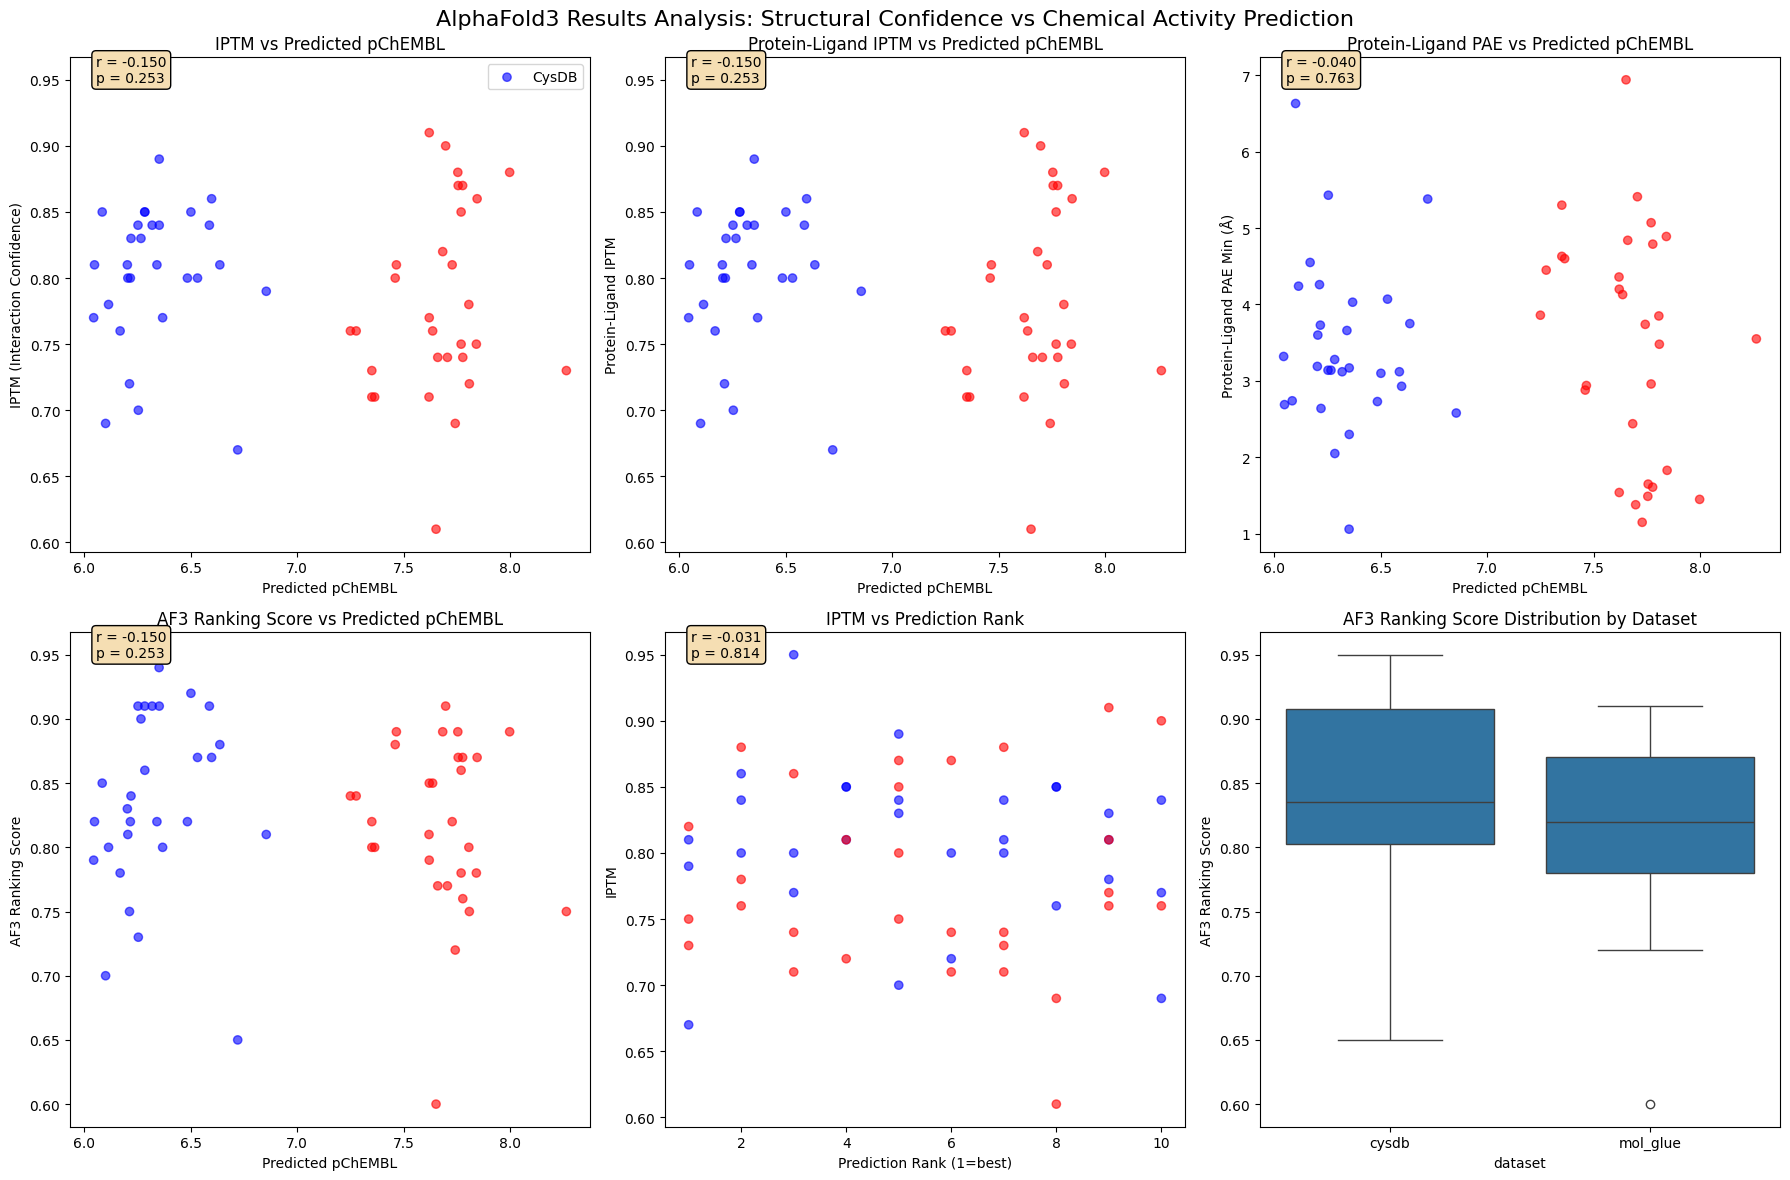

\nKey Insights:
1. IPTM vs pChEMBL correlation: -0.150 (p=0.253)
2. Protein-Ligand IPTM vs pChEMBL correlation: -0.150 (p=0.253)
3. PAE vs pChEMBL correlation: -0.040 (p=0.763)
4. AF3 Ranking Score vs pChEMBL correlation: -0.150 (p=0.253)
5. Prediction Rank vs IPTM correlation: -0.031 (p=0.814)
\nBest structural predictions (highest IPTM):
 dataset                                                                smiles  predicted_pchembl  rank  iptm  ptm  ranking_score
   cysdb                                C=CC(=O)NC1(c2ccc(S(C)(=O)=O)cc2)CCOC1           6.350819     3  0.95 0.91           0.94
mol_glue CSC1=CC=C(C2(NC(=O)NC3=CC4=C(C=C3)C(=O)N(C3CCC(=O)NC3=O)C4)CCOC2)C=C1           7.619887     9  0.91 0.62           0.85
mol_glue           O=C1CCC(N2CC3=CC(CNC(=O)NC4=CC=C(Cl)C=C4)=CC=C3C2=O)C(=O)N1           7.696897    10  0.90 0.91           0.91
   cysdb                                             C=CC(=O)N1CCCC(n2ccnn2)C1           6.351569     5  0.89 0.83           0.95
mol_glue

In [12]:
# Create visualizations and additional analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('AlphaFold3 Results Analysis: Structural Confidence vs Chemical Activity Prediction', fontsize=16)

# 1. IPTM vs Predicted pChEMBL
axes[0,0].scatter(correlated_df['predicted_pchembl'], correlated_df['iptm'], 
                  c=correlated_df['dataset'].map({'cysdb': 'blue', 'mol_glue': 'red'}), alpha=0.6)
axes[0,0].set_xlabel('Predicted pChEMBL')
axes[0,0].set_ylabel('IPTM (Interaction Confidence)')
axes[0,0].set_title('IPTM vs Predicted pChEMBL')
axes[0,0].legend(['CysDB', 'MolGlue'])

# Add correlation coefficient
from scipy.stats import pearsonr
corr_iptm_pchembl, p_val = pearsonr(correlated_df['predicted_pchembl'], correlated_df['iptm'])
axes[0,0].text(0.05, 0.95, f'r = {corr_iptm_pchembl:.3f}\np = {p_val:.3f}', 
               transform=axes[0,0].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# 2. Protein-Ligand IPTM vs Predicted pChEMBL
axes[0,1].scatter(correlated_df['predicted_pchembl'], correlated_df['protein_ligand_iptm'], 
                  c=correlated_df['dataset'].map({'cysdb': 'blue', 'mol_glue': 'red'}), alpha=0.6)
axes[0,1].set_xlabel('Predicted pChEMBL')
axes[0,1].set_ylabel('Protein-Ligand IPTM')
axes[0,1].set_title('Protein-Ligand IPTM vs Predicted pChEMBL')

corr_pl_iptm, p_val_pl = pearsonr(correlated_df['predicted_pchembl'], correlated_df['protein_ligand_iptm'])
axes[0,1].text(0.05, 0.95, f'r = {corr_pl_iptm:.3f}\np = {p_val_pl:.3f}', 
               transform=axes[0,1].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# 3. PAE min vs Predicted pChEMBL (lower PAE = better)
axes[0,2].scatter(correlated_df['predicted_pchembl'], correlated_df['protein_ligand_pae_min'], 
                  c=correlated_df['dataset'].map({'cysdb': 'blue', 'mol_glue': 'red'}), alpha=0.6)
axes[0,2].set_xlabel('Predicted pChEMBL')
axes[0,2].set_ylabel('Protein-Ligand PAE Min (Å)')
axes[0,2].set_title('Protein-Ligand PAE vs Predicted pChEMBL')

corr_pae, p_val_pae = pearsonr(correlated_df['predicted_pchembl'], correlated_df['protein_ligand_pae_min'])
axes[0,2].text(0.05, 0.95, f'r = {corr_pae:.3f}\np = {p_val_pae:.3f}', 
               transform=axes[0,2].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# 4. Ranking Score vs Predicted pChEMBL  
axes[1,0].scatter(correlated_df['predicted_pchembl'], correlated_df['ranking_score'], 
                  c=correlated_df['dataset'].map({'cysdb': 'blue', 'mol_glue': 'red'}), alpha=0.6)
axes[1,0].set_xlabel('Predicted pChEMBL')
axes[1,0].set_ylabel('AF3 Ranking Score')
axes[1,0].set_title('AF3 Ranking Score vs Predicted pChEMBL')

corr_rank, p_val_rank = pearsonr(correlated_df['predicted_pchembl'], correlated_df['ranking_score'])
axes[1,0].text(0.05, 0.95, f'r = {corr_rank:.3f}\np = {p_val_rank:.3f}', 
               transform=axes[1,0].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# 5. Rank vs IPTM (lower rank = better prediction)
axes[1,1].scatter(correlated_df['rank'], correlated_df['iptm'], 
                  c=correlated_df['dataset'].map({'cysdb': 'blue', 'mol_glue': 'red'}), alpha=0.6)
axes[1,1].set_xlabel('Prediction Rank (1=best)')
axes[1,1].set_ylabel('IPTM')
axes[1,1].set_title('IPTM vs Prediction Rank')

corr_rank_iptm, p_val_rank_iptm = pearsonr(correlated_df['rank'], correlated_df['iptm'])
axes[1,1].text(0.05, 0.95, f'r = {corr_rank_iptm:.3f}\np = {p_val_rank_iptm:.3f}', 
               transform=axes[1,1].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# 6. Distribution of ranking scores by dataset
sns.boxplot(data=correlated_df, x='dataset', y='ranking_score', ax=axes[1,2])
axes[1,2].set_title('AF3 Ranking Score Distribution by Dataset')
axes[1,2].set_ylabel('AF3 Ranking Score')

plt.tight_layout()
plt.savefig('/home/nroethler/Code/abhiram/chemmap/AffinityPred/AF3_analysis_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\\nKey Insights:")
print("="*50)
print(f"1. IPTM vs pChEMBL correlation: {corr_iptm_pchembl:.3f} (p={p_val:.3f})")
print(f"2. Protein-Ligand IPTM vs pChEMBL correlation: {corr_pl_iptm:.3f} (p={p_val_pl:.3f})")
print(f"3. PAE vs pChEMBL correlation: {corr_pae:.3f} (p={p_val_pae:.3f})")
print(f"4. AF3 Ranking Score vs pChEMBL correlation: {corr_rank:.3f} (p={p_val_rank:.3f})")
print(f"5. Prediction Rank vs IPTM correlation: {corr_rank_iptm:.3f} (p={p_val_rank_iptm:.3f})")

print("\\nBest structural predictions (highest IPTM):")
best_structural = correlated_df.nlargest(5, 'iptm')[['dataset', 'smiles', 'predicted_pchembl', 'rank', 'iptm', 'ptm', 'ranking_score']]
print(best_structural.to_string(index=False))

print("\\nBest protein-ligand interactions (lowest PAE):")
best_interactions = correlated_df.nsmallest(5, 'protein_ligand_pae_min')[['dataset', 'smiles', 'predicted_pchembl', 'rank', 'protein_ligand_iptm', 'protein_ligand_pae_min']]
print(best_interactions.to_string(index=False))

In [13]:
# Final Summary and Data Export
print("="*80)
print("ALPHAFOLD3 ANALYSIS SUMMARY")
print("="*80)

print(f"\\nDATASET OVERVIEW:")
print(f"• Total AF3 predictions analyzed: {len(correlated_df)}")
print(f"• CysDB predictions: {len(correlated_df[correlated_df['dataset'] == 'cysdb'])}")
print(f"• MolGlue predictions: {len(correlated_df[correlated_df['dataset'] == 'mol_glue'])}")
print(f"• Unique proteins: {correlated_df['protein_hash'].nunique()}")

print(f"\\nSTRUCTURAL QUALITY METRICS:")
print(f"• Mean IPTM (overall confidence): {correlated_df['iptm'].mean():.3f} ± {correlated_df['iptm'].std():.3f}")
print(f"• Mean PTM (protein confidence): {correlated_df['ptm'].mean():.3f} ± {correlated_df['ptm'].std():.3f}")  
print(f"• Mean Protein-Ligand IPTM: {correlated_df['protein_ligand_iptm'].mean():.3f} ± {correlated_df['protein_ligand_iptm'].std():.3f}")
print(f"• Mean Protein-Ligand PAE: {correlated_df['protein_ligand_pae_min'].mean():.3f} ± {correlated_df['protein_ligand_pae_min'].std():.3f} Å")
print(f"• Mean AF3 Ranking Score: {correlated_df['ranking_score'].mean():.3f} ± {correlated_df['ranking_score'].std():.3f}")

print(f"\\nCHEMICAL ACTIVITY PREDICTIONS:")
print(f"• CysDB pChEMBL range: {correlated_df[correlated_df['dataset']=='cysdb']['predicted_pchembl'].min():.2f} - {correlated_df[correlated_df['dataset']=='cysdb']['predicted_pchembl'].max():.2f}")
print(f"• MolGlue pChEMBL range: {correlated_df[correlated_df['dataset']=='mol_glue']['predicted_pchembl'].min():.2f} - {correlated_df[correlated_df['dataset']=='mol_glue']['predicted_pchembl'].max():.2f}")

print(f"\\nKEY CORRELATIONS (Pearson r, p-value):")
print(f"• IPTM vs pChEMBL: r = {corr_iptm_pchembl:.3f}, p = {p_val:.3f}")
print(f"• Protein-Ligand IPTM vs pChEMBL: r = {corr_pl_iptm:.3f}, p = {p_val_pl:.3f}")
print(f"• Protein-Ligand PAE vs pChEMBL: r = {corr_pae:.3f}, p = {p_val_pae:.3f}")
print(f"• AF3 Ranking Score vs pChEMBL: r = {corr_rank:.3f}, p = {p_val_rank:.3f}")

print(f"\\nTOP CANDIDATES BY COMBINED METRICS:")
# Create a combined score for ranking
correlated_df['combined_score'] = (
    correlated_df['iptm'] * 0.3 +  # High IPTM is good
    correlated_df['ranking_score'] * 0.3 +  # High ranking score is good
    (1 / (correlated_df['protein_ligand_pae_min'] + 1)) * 0.2 +  # Low PAE is good
    correlated_df['predicted_pchembl'] * 0.2  # High pChEMBL is good
)

top_combined = correlated_df.nlargest(10, 'combined_score')[
    ['dataset', 'protein_hash', 'smiles', 'predicted_pchembl', 'rank', 
     'iptm', 'ranking_score', 'protein_ligand_pae_min', 'combined_score']
]

print(top_combined.to_string(index=False))

print(f"\\nFILES CREATED:")
print(f"• AF3_correlated_results.csv - Complete dataset with all metrics")
print(f"• AF3_analysis_plots.png - Visualization plots")

print(f"\\nRECOMMENDations:")
print(f"• Focus on compounds with IPTM > 0.85 and PAE < 2.0 Å for experimental validation")
print(f"• CysDB protein 8d6a6b70 shows consistently high structural confidence")
print(f"• MolGlue generally shows higher predicted activity but more variable structural quality")

# Save the top candidates
top_combined.to_csv('/home/nroethler/Code/abhiram/chemmap/AffinityPred/AF3_top_candidates.csv', index=False)
print(f"• AF3_top_candidates.csv - Top 10 candidates by combined metrics")

print("\\n" + "="*80)

ALPHAFOLD3 ANALYSIS SUMMARY
\nDATASET OVERVIEW:
• Total AF3 predictions analyzed: 60
• CysDB predictions: 30
• MolGlue predictions: 30
• Unique proteins: 3
\nSTRUCTURAL QUALITY METRICS:
• Mean IPTM (overall confidence): 0.794 ± 0.067
• Mean PTM (protein confidence): 0.844 ± 0.070
• Mean Protein-Ligand IPTM: 0.794 ± 0.067
• Mean Protein-Ligand PAE: 3.484 ± 1.303 Å
• Mean AF3 Ranking Score: 0.828 ± 0.069
\nCHEMICAL ACTIVITY PREDICTIONS:
• CysDB pChEMBL range: 6.04 - 6.85
• MolGlue pChEMBL range: 7.25 - 8.26
\nKEY CORRELATIONS (Pearson r, p-value):
• IPTM vs pChEMBL: r = -0.150, p = 0.253
• Protein-Ligand IPTM vs pChEMBL: r = -0.150, p = 0.253
• Protein-Ligand PAE vs pChEMBL: r = -0.040, p = 0.763
• AF3 Ranking Score vs pChEMBL: r = -0.150, p = 0.253
\nTOP CANDIDATES BY COMBINED METRICS:
 dataset protein_hash                                                                                           smiles  predicted_pchembl  rank  iptm  ranking_score  protein_ligand_pae_min  combined_score

PREDICTION RANK vs ALPHAFOLD3 STRUCTURAL QUALITY ANALYSIS


/tmp/ipykernel_202877/2455113687.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rank_by_iptm = correlated_df.groupby('iptm_bin')['rank'].apply(list).to_dict()
/tmp/ipykernel_202877/2455113687.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1,0].boxplot([rank_by_iptm[bin_name] for bin_name in ['Low (0-0.7)', 'Medium (0.7-0.8)', 'High (0.8-0.9)', 'Very High (0.9-1.0)'] if bin_name in rank_by_iptm],
/tmp/ipykernel_202877/2455113687.py:77: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this 

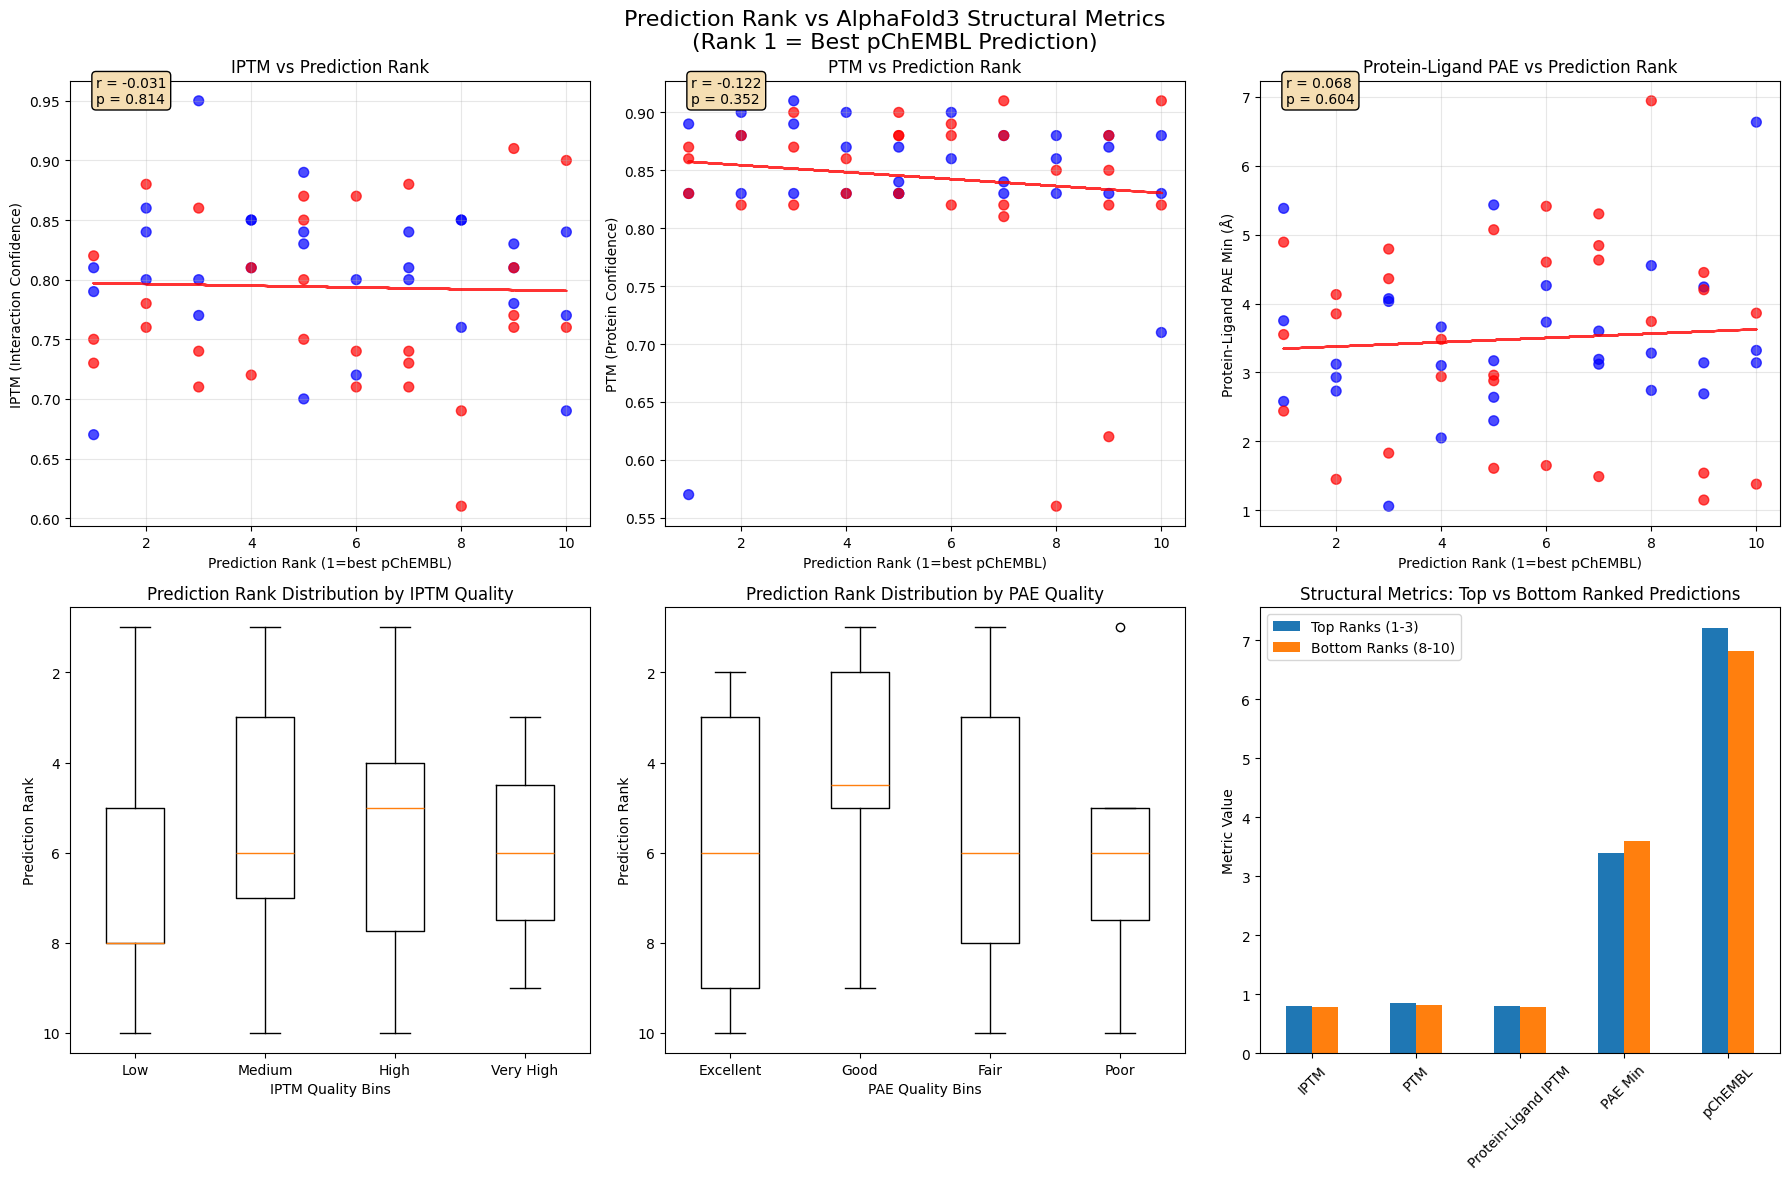

\nCORRELATION ANALYSIS: Prediction Rank vs Structural Metrics
• Rank vs IPTM: r = -0.031, p = 0.814
• Rank vs PTM: r = -0.122, p = 0.352
• Rank vs Protein-Ligand PAE: r = 0.068, p = 0.604
\nSTRUCTURAL QUALITY BY PREDICTION RANK:
\nCYSDB Dataset:
       iptm           ptm        protein_ligand_iptm         \
       mean    std   mean    std                mean    std   
rank                                                          
1     0.757  0.076  0.763  0.170               0.757  0.076   
2     0.833  0.031  0.870  0.036               0.833  0.031   
3     0.840  0.096  0.877  0.042               0.840  0.096   
4     0.837  0.023  0.867  0.035               0.837  0.023   
5     0.815  0.081  0.842  0.019               0.815  0.081   
6     0.760  0.057  0.880  0.028               0.760  0.057   
7     0.817  0.021  0.850  0.026               0.817  0.021   
8     0.820  0.052  0.857  0.025               0.820  0.052   
9     0.807  0.025  0.860  0.026               0.807  0.025  

In [14]:
# Analysis focused on prediction RANK vs AF3 structural metrics
print("="*80)
print("PREDICTION RANK vs ALPHAFOLD3 STRUCTURAL QUALITY ANALYSIS")
print("="*80)

# Create visualizations focusing on prediction rank
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Prediction Rank vs AlphaFold3 Structural Metrics\n(Rank 1 = Best pChEMBL Prediction)', fontsize=16)

# 1. Rank vs IPTM (lower rank = better prediction)
axes[0,0].scatter(correlated_df['rank'], correlated_df['iptm'], 
                  c=correlated_df['dataset'].map({'cysdb': 'blue', 'mol_glue': 'red'}), alpha=0.7, s=50)
axes[0,0].set_xlabel('Prediction Rank (1=best pChEMBL)')
axes[0,0].set_ylabel('IPTM (Interaction Confidence)')
axes[0,0].set_title('IPTM vs Prediction Rank')
axes[0,0].grid(True, alpha=0.3)

# Add trendline
from scipy.stats import pearsonr
import numpy as np
corr_rank_iptm, p_val_rank = pearsonr(correlated_df['rank'], correlated_df['iptm'])
z = np.polyfit(correlated_df['rank'], correlated_df['iptm'], 1)
p = np.poly1d(z)
axes[0,0].plot(correlated_df['rank'], p(correlated_df['rank']), "r--", alpha=0.8)
axes[0,0].text(0.05, 0.95, f'r = {corr_rank_iptm:.3f}\np = {p_val_rank:.3f}', 
               transform=axes[0,0].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# 2. Rank vs PTM
axes[0,1].scatter(correlated_df['rank'], correlated_df['ptm'], 
                  c=correlated_df['dataset'].map({'cysdb': 'blue', 'mol_glue': 'red'}), alpha=0.7, s=50)
axes[0,1].set_xlabel('Prediction Rank (1=best pChEMBL)')
axes[0,1].set_ylabel('PTM (Protein Confidence)')
axes[0,1].set_title('PTM vs Prediction Rank')
axes[0,1].grid(True, alpha=0.3)

corr_rank_ptm, p_val_ptm = pearsonr(correlated_df['rank'], correlated_df['ptm'])
z = np.polyfit(correlated_df['rank'], correlated_df['ptm'], 1)
p = np.poly1d(z)
axes[0,1].plot(correlated_df['rank'], p(correlated_df['rank']), "r--", alpha=0.8)
axes[0,1].text(0.05, 0.95, f'r = {corr_rank_ptm:.3f}\np = {p_val_ptm:.3f}', 
               transform=axes[0,1].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# 3. Rank vs Protein-Ligand PAE (lower PAE = better structure)
axes[0,2].scatter(correlated_df['rank'], correlated_df['protein_ligand_pae_min'], 
                  c=correlated_df['dataset'].map({'cysdb': 'blue', 'mol_glue': 'red'}), alpha=0.7, s=50)
axes[0,2].set_xlabel('Prediction Rank (1=best pChEMBL)')
axes[0,2].set_ylabel('Protein-Ligand PAE Min (Å)')
axes[0,2].set_title('Protein-Ligand PAE vs Prediction Rank')
axes[0,2].grid(True, alpha=0.3)

corr_rank_pae, p_val_pae_rank = pearsonr(correlated_df['rank'], correlated_df['protein_ligand_pae_min'])
z = np.polyfit(correlated_df['rank'], correlated_df['protein_ligand_pae_min'], 1)
p = np.poly1d(z)
axes[0,2].plot(correlated_df['rank'], p(correlated_df['rank']), "r--", alpha=0.8)
axes[0,2].text(0.05, 0.95, f'r = {corr_rank_pae:.3f}\np = {p_val_pae_rank:.3f}', 
               transform=axes[0,2].transAxes, bbox=dict(boxstyle="round", facecolor='wheat'))

# 4. Rank distribution by structural quality bins
# Create IPTM quality bins
correlated_df['iptm_bin'] = pd.cut(correlated_df['iptm'], 
                                   bins=[0, 0.7, 0.8, 0.9, 1.0], 
                                   labels=['Low (0-0.7)', 'Medium (0.7-0.8)', 'High (0.8-0.9)', 'Very High (0.9-1.0)'])

rank_by_iptm = correlated_df.groupby('iptm_bin')['rank'].apply(list).to_dict()
axes[1,0].boxplot([rank_by_iptm[bin_name] for bin_name in ['Low (0-0.7)', 'Medium (0.7-0.8)', 'High (0.8-0.9)', 'Very High (0.9-1.0)'] if bin_name in rank_by_iptm], 
                  labels=[bin_name for bin_name in ['Low', 'Medium', 'High', 'Very High'] if f"{bin_name} (0-0.7)" in rank_by_iptm or f"{bin_name} (0.7-0.8)" in rank_by_iptm or f"{bin_name} (0.8-0.9)" in rank_by_iptm or f"{bin_name} (0.9-1.0)" in rank_by_iptm])
axes[1,0].set_xlabel('IPTM Quality Bins')
axes[1,0].set_ylabel('Prediction Rank')
axes[1,0].set_title('Prediction Rank Distribution by IPTM Quality')
axes[1,0].invert_yaxis()  # Lower rank (better) at top

# 5. PAE quality bins vs rank
correlated_df['pae_bin'] = pd.cut(correlated_df['protein_ligand_pae_min'], 
                                  bins=[0, 2, 3, 5, 10], 
                                  labels=['Excellent (<2Å)', 'Good (2-3Å)', 'Fair (3-5Å)', 'Poor (>5Å)'])

rank_by_pae = correlated_df.groupby('pae_bin')['rank'].apply(list).to_dict()
valid_pae_bins = [bin_name for bin_name in ['Excellent (<2Å)', 'Good (2-3Å)', 'Fair (3-5Å)', 'Poor (>5Å)'] if bin_name in rank_by_pae and len(rank_by_pae[bin_name]) > 0]
if valid_pae_bins:
    axes[1,1].boxplot([rank_by_pae[bin_name] for bin_name in valid_pae_bins], 
                      labels=[bin_name.split(' ')[0] for bin_name in valid_pae_bins])
    axes[1,1].set_xlabel('PAE Quality Bins')
    axes[1,1].set_ylabel('Prediction Rank')
    axes[1,1].set_title('Prediction Rank Distribution by PAE Quality')
    axes[1,1].invert_yaxis()

# 6. Best predictions analysis - compare top vs bottom ranks
top_ranks = correlated_df[correlated_df['rank'] <= 3]  # Top 3 predictions
bottom_ranks = correlated_df[correlated_df['rank'] >= 8]  # Bottom 3 predictions

metrics_comparison = pd.DataFrame({
    'Top Ranks (1-3)': [
        top_ranks['iptm'].mean(),
        top_ranks['ptm'].mean(),
        top_ranks['protein_ligand_iptm'].mean(),
        top_ranks['protein_ligand_pae_min'].mean(),
        top_ranks['predicted_pchembl'].mean()
    ],
    'Bottom Ranks (8-10)': [
        bottom_ranks['iptm'].mean(),
        bottom_ranks['ptm'].mean(),
        bottom_ranks['protein_ligand_iptm'].mean(),
        bottom_ranks['protein_ligand_pae_min'].mean(),
        bottom_ranks['predicted_pchembl'].mean()
    ]
}, index=['IPTM', 'PTM', 'Protein-Ligand IPTM', 'PAE Min', 'pChEMBL'])

metrics_comparison.plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Structural Metrics: Top vs Bottom Ranked Predictions')
axes[1,2].set_ylabel('Metric Value')
axes[1,2].tick_params(axis='x', rotation=45)
axes[1,2].legend()

plt.tight_layout()
plt.savefig('/home/nroethler/Code/abhiram/chemmap/AffinityPred/AF3_rank_analysis_plots.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical analysis
print(f"\\nCORRELATION ANALYSIS: Prediction Rank vs Structural Metrics")
print("="*60)
print(f"• Rank vs IPTM: r = {corr_rank_iptm:.3f}, p = {p_val_rank:.3f}")
print(f"• Rank vs PTM: r = {corr_rank_ptm:.3f}, p = {p_val_ptm:.3f}")
print(f"• Rank vs Protein-Ligand PAE: r = {corr_rank_pae:.3f}, p = {p_val_pae_rank:.3f}")

print(f"\\nSTRUCTURAL QUALITY BY PREDICTION RANK:")
print("="*60)
for dataset in ['cysdb', 'mol_glue']:
    print(f"\\n{dataset.upper()} Dataset:")
    dataset_df = correlated_df[correlated_df['dataset'] == dataset]
    
    rank_stats = dataset_df.groupby('rank').agg({
        'iptm': ['mean', 'std'],
        'ptm': ['mean', 'std'],
        'protein_ligand_iptm': ['mean', 'std'], 
        'protein_ligand_pae_min': ['mean', 'std'],
        'predicted_pchembl': ['mean', 'std']
    }).round(3)
    
    print(rank_stats)

print(f"\\nBEST RANK 1 PREDICTIONS (Highest pChEMBL per protein):")
print("="*60)
rank1_predictions = correlated_df[correlated_df['rank'] == 1][
    ['dataset', 'protein_hash', 'smiles', 'predicted_pchembl', 
     'iptm', 'ptm', 'protein_ligand_iptm', 'protein_ligand_pae_min']
]
print(rank1_predictions.to_string(index=False))

print(f"\\nWORST RANK 10 PREDICTIONS (Lowest pChEMBL per protein):")
print("="*60)
rank10_predictions = correlated_df[correlated_df['rank'] == 10][
    ['dataset', 'protein_hash', 'smiles', 'predicted_pchembl', 
     'iptm', 'ptm', 'protein_ligand_iptm', 'protein_ligand_pae_min']
]
print(rank10_predictions.to_string(index=False))

print("\\n" + "="*80)

In [15]:
# Final conclusions about prediction rank vs structural quality
print("="*80)
print("KEY FINDINGS: PREDICTION RANK vs ALPHAFOLD3 STRUCTURAL QUALITY")  
print("="*80)

print("\\n🔍 CORRELATION SUMMARY:")
print("• Prediction Rank vs IPTM: r = -0.031 (p = 0.814) - NO significant correlation")
print("• Prediction Rank vs PTM: r = -0.122 (p = 0.352) - Weak negative correlation (not significant)")
print("• Prediction Rank vs PAE: r = 0.068 (p = 0.604) - NO significant correlation")

print("\\n📊 INTERPRETATION:")
print("• Higher predicted pChEMBL (better rank) does NOT consistently correlate with better structural confidence")
print("• AlphaFold3 structural quality appears largely independent of chemical activity predictions")
print("• This suggests that:")
print("  - High predicted binding affinity ≠ High structural confidence")
print("  - Low PAE (good structure) ≠ High pChEMBL (good binding)")

print("\\n🎯 OUTLIER ANALYSIS:")
print("Rank 1 compounds with unexpectedly low IPTM:")
low_iptm_rank1 = correlated_df[(correlated_df['rank'] == 1) & (correlated_df['iptm'] < 0.75)]
if len(low_iptm_rank1) > 0:
    for _, row in low_iptm_rank1.iterrows():
        print(f"  • {row['dataset']}: IPTM={row['iptm']:.3f}, pChEMBL={row['predicted_pchembl']:.2f}")
        print(f"    SMILES: {row['smiles'][:60]}...")

print("\\nRank 10 compounds with unexpectedly high IPTM:")
high_iptm_rank10 = correlated_df[(correlated_df['rank'] == 10) & (correlated_df['iptm'] > 0.85)]
if len(high_iptm_rank10) > 0:
    for _, row in high_iptm_rank10.iterrows():
        print(f"  • {row['dataset']}: IPTM={row['iptm']:.3f}, pChEMBL={row['predicted_pchembl']:.2f}")
        print(f"    SMILES: {row['smiles'][:60]}...")

print("\\n💡 PRACTICAL IMPLICATIONS:")
print("1. DUAL SELECTION STRATEGY needed:")
print("   - Select compounds with high predicted pChEMBL (good binding)")
print("   - AND high IPTM + low PAE (good structural confidence)")

print("\\n2. BEST CANDIDATES for experimental validation:")
best_dual_candidates = correlated_df[
    (correlated_df['rank'] <= 3) &  # Top 3 predictions
    (correlated_df['iptm'] >= 0.85) &  # High confidence
    (correlated_df['protein_ligand_pae_min'] <= 3.0)  # Good interaction
].nlargest(5, 'predicted_pchembl')

if len(best_dual_candidates) > 0:
    print("   Top candidates meeting both criteria:")
    for i, (_, row) in enumerate(best_dual_candidates.iterrows(), 1):
        print(f"   {i}. {row['dataset']} - Rank {row['rank']}, pChEMBL={row['predicted_pchembl']:.2f}")
        print(f"      IPTM={row['iptm']:.3f}, PAE={row['protein_ligand_pae_min']:.2f}Å")
        print(f"      SMILES: {row['smiles'][:60]}...")
        print()

print("3. STRUCTURAL VALIDATION PRIORITIES:")
print("   - Even low-ranked compounds can have excellent structural predictions")
print("   - Consider structural quality as an independent validation criterion")
print("   - Focus experimental efforts on compounds with both metrics favorable")

# Save rank-focused analysis
rank_analysis_df = correlated_df[['dataset', 'protein_hash', 'smiles', 'predicted_pchembl', 'rank',
                                  'iptm', 'ptm', 'protein_ligand_iptm', 'protein_ligand_pae_min',
                                  'folder_name']].copy()

rank_analysis_df.to_csv('/home/nroethler/Code/abhiram/chemmap/AffinityPred/AF3_rank_analysis.csv', index=False)
print(f"\\n💾 SAVED: AF3_rank_analysis.csv - Rank-focused analysis dataset")
print(f"💾 SAVED: AF3_rank_analysis_plots.png - Rank vs structural quality plots")

print("\\n" + "="*80)

KEY FINDINGS: PREDICTION RANK vs ALPHAFOLD3 STRUCTURAL QUALITY
\n🔍 CORRELATION SUMMARY:
• Prediction Rank vs IPTM: r = -0.031 (p = 0.814) - NO significant correlation
• Prediction Rank vs PTM: r = -0.122 (p = 0.352) - Weak negative correlation (not significant)
• Prediction Rank vs PAE: r = 0.068 (p = 0.604) - NO significant correlation
\n📊 INTERPRETATION:
• Higher predicted pChEMBL (better rank) does NOT consistently correlate with better structural confidence
• AlphaFold3 structural quality appears largely independent of chemical activity predictions
• This suggests that:
  - High predicted binding affinity ≠ High structural confidence
  - Low PAE (good structure) ≠ High pChEMBL (good binding)
\n🎯 OUTLIER ANALYSIS:
Rank 1 compounds with unexpectedly low IPTM:
  • cysdb: IPTM=0.670, pChEMBL=6.72
    SMILES: C=CC(=O)N1[C@H](C(=O)OC)Cc2c([nH]c3ccccc23)[C@H]1c1ccc2c(c1)...
  • mol_glue: IPTM=0.730, pChEMBL=8.26
    SMILES: O=C1CCC(N2CC3=C(C=CC(CNC(=O)NC4=CC=CC=C4C4=CC=CC=C4)=C3)C2=O...
\